# Prediction using Deep Learning

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyse the data. As a Data scientist in an insurance company, you need to analyse the available data and predict whether to approve the insurance or not.

#Author: Mohit T. Kumbhare And Pranay D. Sonkusare

## Date: 17 Jan 2022

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Project/data.csv')

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
# Checking Any Null or unwanted Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [26]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [28]:
df['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [5]:
# Spliting into feature and target
X = df.drop('Claim', axis = 1)
y = df['Claim']

In [6]:
# Seperating numerical and categorical data
df_num = X.select_dtypes(['int64', 'float64'])
df_cat = X.select_dtypes(['object'])

In [27]:
df_num.head()

,Duration,Net Sales,Commision (in value),Age
0,7,0.0,17.82,31
1,85,69.0,0.00,36
2,11,19.8,11.88,75
3,16,20.0,0.00,32
4,10,15.0,0.00,29


In [8]:
# replace nan value with unknown
df_cat['Gender'].replace(np.nan, 'Unknown', inplace = True)
df_cat['Gender'].value_counts()

Unknown    35953
M           7527
F           7073
Name: Gender, dtype: int64

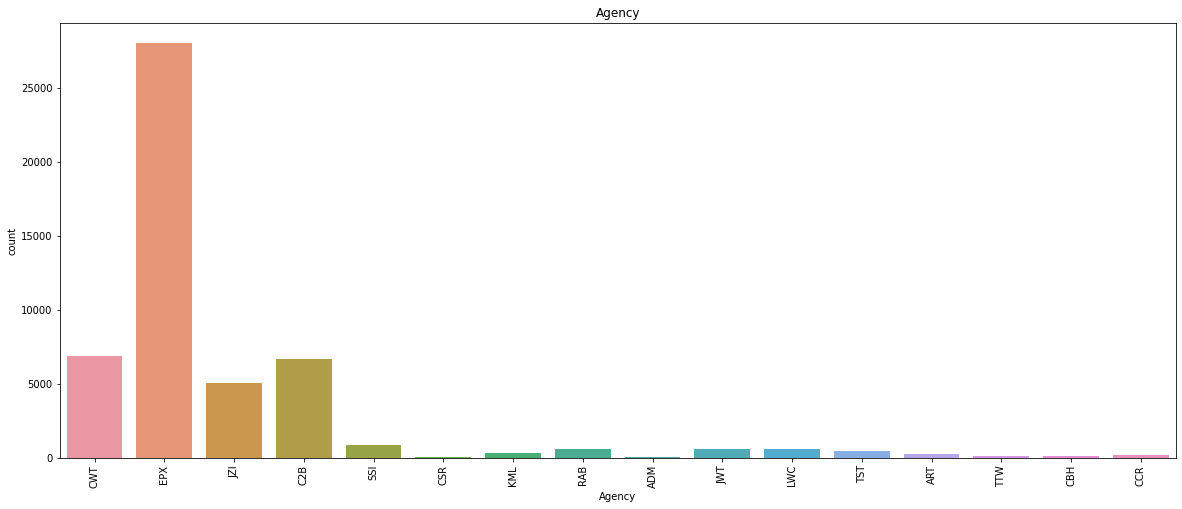

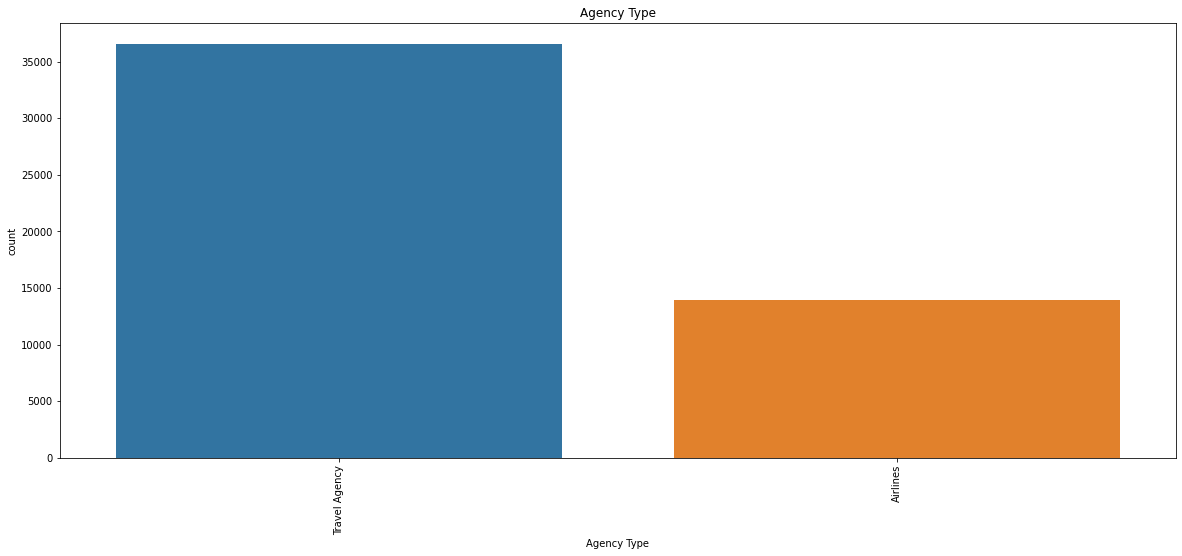

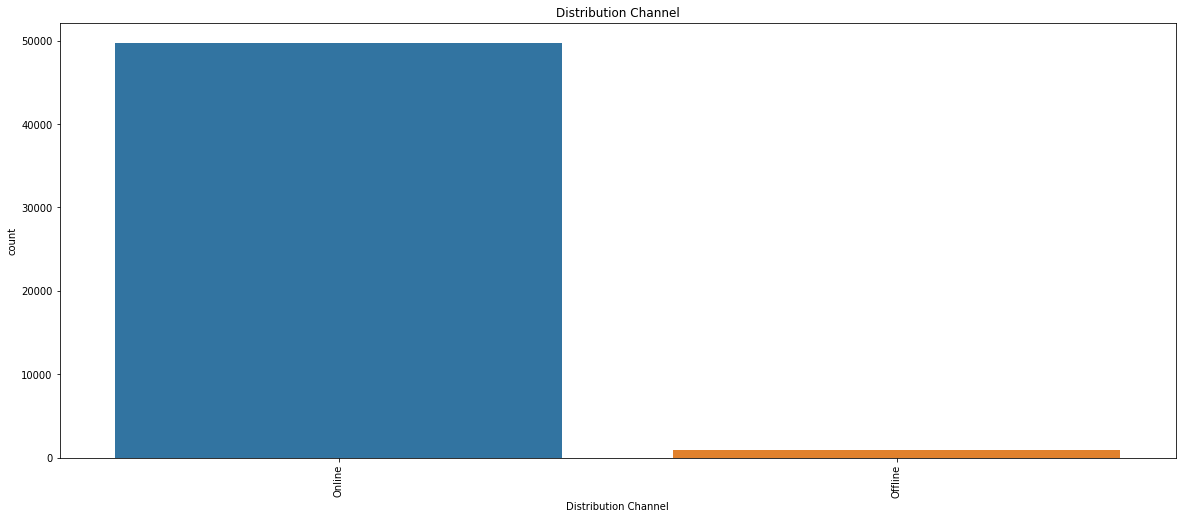

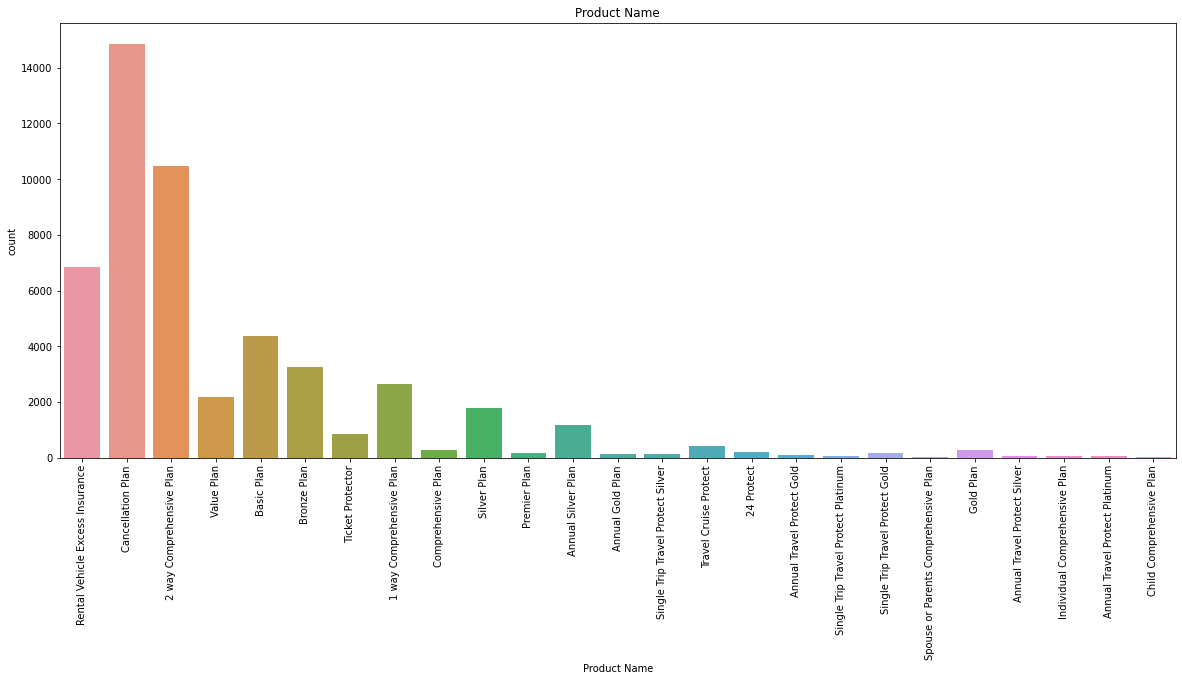

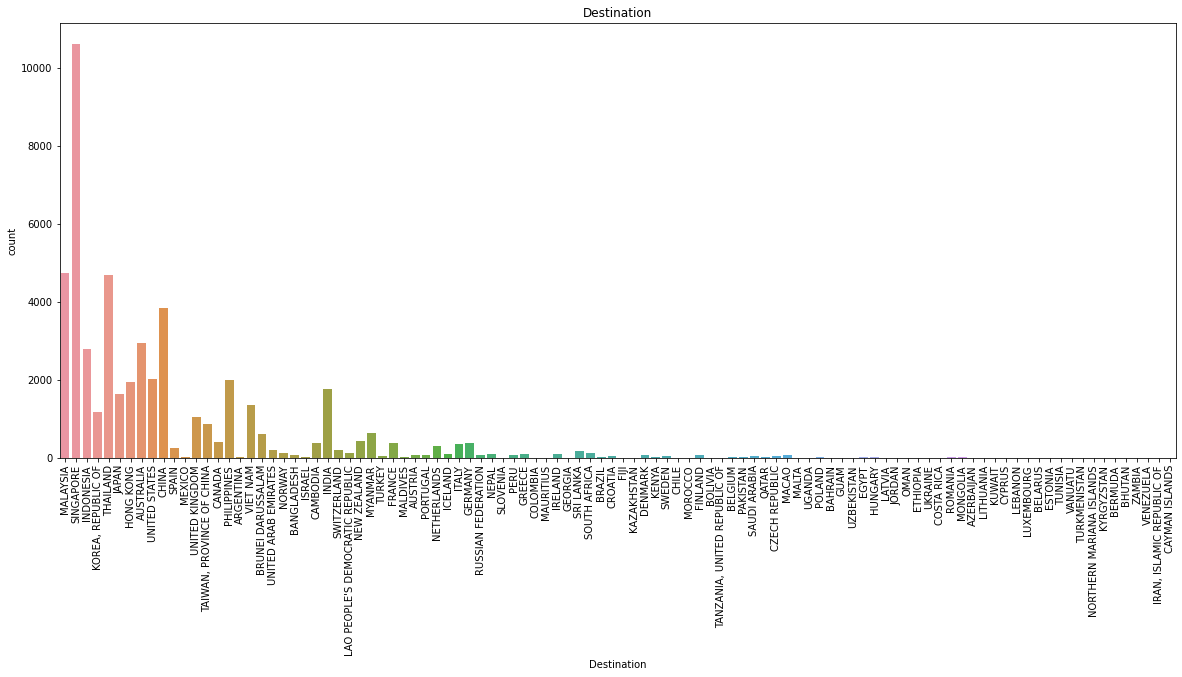

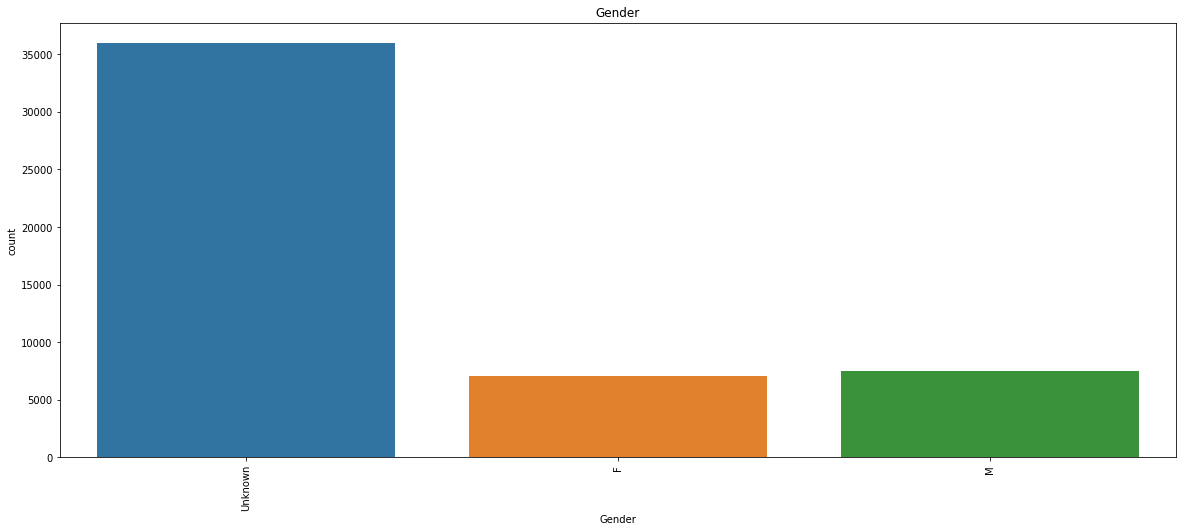

In [9]:
for i in df_cat:
  plt.figure(figsize=(20,8))
  sns.countplot(data=df_cat, x=i)
  plt.title(i)
  plt.xticks(rotation = 90)
  plt.show()

In [10]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,Unknown
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,Unknown
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,Unknown
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA,Unknown
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF",Unknown


In [11]:
# One-Hot encoding
df_cat = pd.get_dummies(df_cat)

In [12]:
df_num.head()

,ID,Duration,Net Sales,Commision (in value),Age
0,3433,7,0.0,17.82,31
1,4339,85,69.0,0.00,36
2,34590,11,19.8,11.88,75
3,55816,16,20.0,0.00,32
4,13816,10,15.0,0.00,29


In [13]:
df_num = df_num.drop('ID', axis = 1)

In [14]:
# Concat numerical and categorical data
X = pd.concat([df_num, df_cat], axis = 1)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [16]:
data = ['Duration',	'Net Sales',	'Commision (in value)',	'Age']
ss = StandardScaler()
for i in data:
  X_train[i] = ss.fit_transform(X_train[[i]])
  X_test[i] = ss.transform(X_test[[i]])

In [17]:
X_train.shape

(35387, 154)

In [18]:
# Architecture
model = Sequential()
model.add(Dense(32, activation="tanh", input_dim=154))
# model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(2, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [19]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [20]:
# Over Sampling
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [21]:
y_train_rs.value_counts()

1    34851
0    34851
Name: Claim, dtype: int64

In [22]:
model.fit(X_train_rs,y_train_rs, batch_size=128, epochs=30)

Epoch 1/30
545/545 [==============================] - 2s 3ms/step - loss: 0.5502
Epoch 2/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4861
Epoch 3/30
545/545 [==============================] - 1s 3ms/step - loss: 0.4744
Epoch 4/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4673
Epoch 5/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4625
Epoch 6/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4595
Epoch 7/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4543
Epoch 8/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4524
Epoch 9/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4490
Epoch 10/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4472
Epoch 11/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4442
Epoch 12/30
545/545 [==============================] - 1s 2ms/step - loss: 0.4428
Epoch 13/30
545/545 [====

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     14961
           1       0.05      0.51      0.09       205

    accuracy                           0.86     15166
   macro avg       0.52      0.69      0.51     15166
weighted avg       0.98      0.86      0.91     15166

